# 1. Import packages

In [1]:
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# import gene selection modules
import gene_selection
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)

<module 'loci_1d_features' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\loci_1d_features.py'>

In [4]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

import pandas as pd

19936


# 2. Get all MERFISH loci (old codebook for example) with adjacent gene annotation

In [5]:
# load a pre-prepared adjacent gene dataframe for all MERFISH-loci
gene_fname = r"C:\Users\shiwei\Documents\AnalysisTool_Chromatin\resources\old_MERFISH_loci_adjacent_genes_tss.csv"

im_loci_df = pd.read_csv(gene_fname, index_col=0)

In [7]:
# Change column names to to be compatible with the gene score functions/pipelines below 
im_loci_df_new = im_loci_df[['name','id','chr','chr_order']]

dist_list = [0,10,50,100,500,1000,1500,2000]
adjacent_gene_cols = [f'adjacent_genes_{_dist}kb_tss' for _dist in dist_list]
for _col in adjacent_gene_cols:
    im_loci_df_new[_col.capitalize()]=im_loci_df[_col]

im_loci_df_new.head()

<ipython-input-7-9ec869b8a4db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_loci_df_new[_col.capitalize()]=im_loci_df[_col]


,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss
loci_name,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...
chr1_11240000_11260000,1:11240000-11260000,4,1,5,intergenic,intergenic,intergenic,intergenic,A830018L16Rik; Prex2,A830018L16Rik; Cpa6; Gm15603; Gm15604; Gm7560;...,1700034P13Rik; A830018L16Rik; Arfgef1; Cops5; ...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...
chr1_13740000_13760000,1:13740000-13760000,5,1,6,intergenic,intergenic,Gm5523,Gm5523; Lactb2,Gm5523; Gm7593; Lactb2; Ncoa2; Tram1,Eya1; Gm5523; Gm7593; Lactb2; Msc; Ncoa2; Slco...,Eya1; Gm17644; Gm2383; Gm5523; Gm6216; Gm7593;...,Eya1; Gm10566; Gm17644; Gm2383; Gm5523; Gm6216...


In [8]:
# sort codebook by chromosome order (optional)
im_loci_df_new = loci_1d_features.sort_loci_df_by_chr_order(im_loci_df_new)
im_loci_df_new.head()

,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss
loci_name,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...


# 3. Load AnnData for all gene expression information

In [9]:
# Get loaded adata that is pre-prepared from other notebook
#%store -r adata
import os
import scanpy as sc
# L drive below is the crick annData
scRNA_folder =r'L:\Shiwei\DNA_MERFISH_analysis\SMARTer_nuclei_MOp'
# load from here for saved h5ad
adata = sc.read(os.path.join(scRNA_folder,r'MOp_smart_sn_labeled_20220707.h5ad'))

In [14]:
# Use these three columns below for consistent labeling of our MERFISH data
adata.obs[['subclass_label_new','class_label_new','neuron_identity']]

,subclass_label_new,class_label_new,neuron_identity
barcode,,,
SM-GE653_S113_E1-50,Lamp5,GABA,Neuronal
SM-GE653_S114_E1-50,Lamp5,GABA,Neuronal
SM-GE653_S115_E1-50,Lamp5,GABA,Neuronal
SM-GE653_S116_E1-50,Lamp5,GABA,Neuronal
SM-GE653_S117_E1-50,Lamp5,GABA,Neuronal
...,...,...,...
SM-GE66H_S083_E1-50,L5/6 NP,Gluta,Neuronal
SM-GE66H_S084_E1-50,Vip,GABA,Neuronal
SM-GE66H_S085_E1-50,Pvalb,GABA,Neuronal


# 4. Add cell types of interest for their transcirption activity around the MERFISH loci

In [15]:
# add the Groupby and Compared_group keys manually here, which will be used for retrieving transcription acitvity, etc
marker_genes_df = im_loci_df_new.copy()

# Groupby means the hierachy-level to be used for calling cell groups; see options in the box above
# here we use class-level as example
marker_genes_df['Groupby'] ='class_label_new'
# Compared_groups are the corresponding pairwise; use '; ' to split the two compared groups
marker_genes_df['Compared_groups'] ='Gluta; Astro'
marker_genes_df.head()

,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss,Groupby,Compared_groups
loci_name,,,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,class_label_new,Gluta; Astro
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,class_label_new,Gluta; Astro
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,class_label_new,Gluta; Astro
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Gluta; Astro
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Gluta; Astro


In [16]:
# import gene selection modules to get the activity score for example
import gene_selection
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)

#from gene_activity import gene_activity_score_gene_dataframe
from gene_activity import gene_activity_average_gene_dataframe
#from gene_activity import gene_activity_pts_gene_dataframe


# use these three columns existing in the gene_dataframe as example
adjacent_gene_cols = ['Adjacent_genes_0kb_tss',
                      'Adjacent_genes_100kb_tss',
                      'Adjacent_genes_1000kb_tss']


#adjacent_gene_cols = [_c.lower() for _c in adjacent_gene_cols]

for _col in adjacent_gene_cols:
    print (f'Process for {_col}')
    # get gene activity for genes from each column above for each compared cell types
    marker_genes_df= gene_activity_average_gene_dataframe (marker_genes_df, 
                                        adata, 
                                        adjacent_gene_col = _col,
                                        #stat_method = 'wilcoxon',
                                        report_type = 'sum',  # summing all genes' mean count
                                        parallel=False, 
                                        num_threads = 8)
    
marker_genes_df    

Process for Adjacent_genes_0kb_tss
Looping for gene acitivity calculation:
Complete in 26.841s.
Process for Adjacent_genes_100kb_tss
Looping for gene acitivity calculation:
Complete in 27.697s.
Process for Adjacent_genes_1000kb_tss
Looping for gene acitivity calculation:
Complete in 32.648s.


,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,Adjacent_genes_1500kb_tss,Adjacent_genes_2000kb_tss,Groupby,Compared_groups,Activity_average_sum_genes_0kb_tss: Gluta,Activity_average_sum_genes_0kb_tss: Astro,Activity_average_sum_genes_100kb_tss: Gluta,Activity_average_sum_genes_100kb_tss: Astro,Activity_average_sum_genes_1000kb_tss: Gluta,Activity_average_sum_genes_1000kb_tss: Astro
loci_name,,,,,,,,,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,class_label_new,Gluta; Astro,0.000000,0.000000,66.099533,1.366061,76.100393,11.366061
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,class_label_new,Gluta; Astro,0.000000,0.000000,163.712370,94.631487,258.165473,226.336809
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,class_label_new,Gluta; Astro,0.000000,0.000000,1.000000,1.000000,93.343712,195.643749
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Gluta; Astro,1.055930,3.436225,43.751140,191.643749,421.468793,380.728389
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...,class_label_new,Gluta; Astro,29.008308,12.192850,99.765526,63.619970,435.059908,382.728389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_166240000_166260000,X:166240000-166260000,1059,X,59,intergenic,Gpm6b,Gpm6b,Gemin8; Gpm6b,Egfl6; Gemin8; Gm15223; Gm15225; Gm1720; Gpm6b...,Egfl6; Gemin8; Glra2; Gm15223; Gm15225; Gm1523...,Egfl6; Fancb; Gemin8; Glra2; Gm15223; Gm15225;...,Asb11; Asb9; Bmx; Egfl6; Fancb; Gemin8; Glra2;...,class_label_new,Gluta; Astro,0.000000,0.000000,452.844302,794.470584,829.937940,941.946580
chrX_167122110_167191320,X:167122110-167191320,2052,X,60,intergenic,intergenic,Gm15232; Tmsb4x,Gm15232; Gm8814; Tmsb4x,Gm15230; Gm15232; Gm1720; Gm8814; Prps2; Tlr7;...,Egfl6; Gemin8; Gm15223; Gm15230; Gm15232; Gm15...,Egfl6; Frmpd4; Gemin8; Gm15223; Gm15225; Gm152...,Amelx; Arhgap6; Egfl6; Frmpd4; Gemin8; Glra2; ...,class_label_new,Gluta; Astro,0.000000,0.000000,307.824799,58.799820,823.384759,943.493912
chrX_168740000_168760000,X:168740000-168760000,1060,X,61,intergenic,intergenic,Arhgap6,Arhgap6; Msl3,Amelx; Arhgap6; Frmpd4; Msl3,Amelx; Arhgap6; Frmpd4; Gm15238; Gm15240; Hccs...,Amelx; Arhgap6; Erdr1; Frmpd4; G530011O06Rik; ...,Amelx; Arhgap6; Asmt; Erdr1; Frmpd4; G530011O0...,class_label_new,Gluta; Astro,0.000000,0.000000,22.071972,10.696682,127.717056,64.441011


In [17]:
# the calculated genes score will be something like 'Activity_average_sum_genes_0kb_tss: cellgroupA' and 'Activity_average_sum_genes_0kb_tss: cellgroupB'
marker_genes_df.columns

Index(['name', 'id', 'chr', 'chr_order', 'Adjacent_genes_0kb_tss',
       'Adjacent_genes_10kb_tss', 'Adjacent_genes_50kb_tss',
       'Adjacent_genes_100kb_tss', 'Adjacent_genes_500kb_tss',
       'Adjacent_genes_1000kb_tss', 'Adjacent_genes_1500kb_tss',
       'Adjacent_genes_2000kb_tss', 'Groupby', 'Compared_groups',
       'Activity_average_sum_genes_0kb_tss: Gluta',
       'Activity_average_sum_genes_0kb_tss: Astro',
       'Activity_average_sum_genes_100kb_tss: Gluta',
       'Activity_average_sum_genes_100kb_tss: Astro',
       'Activity_average_sum_genes_1000kb_tss: Gluta',
       'Activity_average_sum_genes_1000kb_tss: Astro'],
      dtype='object')

# 5. Alternative function to reflect gene expression

In [20]:
from gene_activity import gene_activity_pts_gene_dataframe

# use these three columns existing in the gene_dataframe as example
adjacent_gene_cols = ['Adjacent_genes_0kb_tss',
                      'Adjacent_genes_100kb_tss',
                      'Adjacent_genes_1000kb_tss']


#adjacent_gene_cols = [_c.lower() for _c in adjacent_gene_cols]

for _col in adjacent_gene_cols:
    print (f'Process for {_col}')
    # get gene expression pts for genes from each column above for each compared cell types
    marker_genes_df= gene_activity_pts_gene_dataframe (marker_genes_df, 
                                        adata, 
                                        adjacent_gene_col = _col,
                                        #stat_method = 'wilcoxon',
                                        report_type = 'mean',    # mean of all pts for each genes
                                        parallel=False, 
                                        num_threads = 8)
    
marker_genes_df    

Process for Adjacent_genes_0kb_tss
Use existing result from the input adata.
Looping for gene acitivity calculation:


C:\Users\shiwei\Documents\AnalysisTool_Chromatin\gene_activity.py:228: RuntimeWarning: Mean of empty slice
  result = np.nanmean(norm_sel_genes_pts)


Complete in 41.133s.
Process for Adjacent_genes_100kb_tss
Use existing result from the input adata.
Looping for gene acitivity calculation:
Complete in 41.427s.
Process for Adjacent_genes_1000kb_tss
Use existing result from the input adata.
Looping for gene acitivity calculation:
Complete in 43.822s.


,name,id,chr,chr_order,Adjacent_genes_0kb_tss,Adjacent_genes_10kb_tss,Adjacent_genes_50kb_tss,Adjacent_genes_100kb_tss,Adjacent_genes_500kb_tss,Adjacent_genes_1000kb_tss,...,Activity_average_sum_genes_100kb_tss: Gluta,Activity_average_sum_genes_100kb_tss: Astro,Activity_average_sum_genes_1000kb_tss: Gluta,Activity_average_sum_genes_1000kb_tss: Astro,Activity_pts_mean_genes_0kb_tss: Gluta,Activity_pts_mean_genes_0kb_tss: Astro,Activity_pts_mean_genes_100kb_tss: Gluta,Activity_pts_mean_genes_100kb_tss: Astro,Activity_pts_mean_genes_1000kb_tss: Gluta,Activity_pts_mean_genes_1000kb_tss: Astro
loci_name,,,,,,,,,,,,,,,,,,,,,
chr1_3740000_3760000,1:3740000-3760000,1,1,0,intergenic,intergenic,intergenic,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,...,66.099533,1.366061,76.100393,11.366061,NaN,NaN,0.478522,0.032258,0.053036,0.004888
chr1_6240000_6260000,1:6240000-6260000,2,1,1,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,...,163.712370,94.631487,258.165473,226.336809,NaN,NaN,0.564795,0.215054,0.169906,0.072581
chr1_8740000_8760000,1:8740000-8760000,3,1,2,intergenic,intergenic,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,...,1.000000,1.000000,93.343712,195.643749,NaN,NaN,0.015359,0.010753,0.075354,0.053763
chr1_9600471_9656458,1:9600471-9656458,1063,1,3,2610203C22Rik,2610203C22Rik,2610203C22Rik; Gm6161; Mybl1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,...,43.751140,191.643749,421.468793,380.728389,0.049676,0.010753,0.061885,0.079301,0.176448,0.091164
chr1_9749317_9845402,1:9749317-9845402,1064,1,4,Gm6195; Sgk3,1700034P13Rik; Gm6195; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mybl1; Sgk3; Vcpip1,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Sn...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,...,99.765526,63.619970,435.059908,382.728389,0.211783,0.075269,0.177856,0.068548,0.165712,0.083871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_166240000_166260000,X:166240000-166260000,1059,X,59,intergenic,Gpm6b,Gpm6b,Gemin8; Gpm6b,Egfl6; Gemin8; Gm15223; Gm15225; Gm1720; Gpm6b...,Egfl6; Gemin8; Glra2; Gm15223; Gm15225; Gm1523...,...,452.844302,794.470584,829.937940,941.946580,NaN,NaN,0.508879,0.494624,0.201056,0.127599
chrX_167122110_167191320,X:167122110-167191320,2052,X,60,intergenic,intergenic,Gm15232; Tmsb4x,Gm15232; Gm8814; Tmsb4x,Gm15230; Gm15232; Gm1720; Gm8814; Prps2; Tlr7;...,Egfl6; Gemin8; Gm15223; Gm15230; Gm15232; Gm15...,...,307.824799,58.799820,823.384759,943.493912,NaN,NaN,0.351492,0.168459,0.178108,0.112587
chrX_168740000_168760000,X:168740000-168760000,1060,X,61,intergenic,intergenic,Arhgap6,Arhgap6; Msl3,Amelx; Arhgap6; Frmpd4; Msl3,Amelx; Arhgap6; Frmpd4; Gm15238; Gm15240; Hccs...,...,22.071972,10.696682,127.717056,64.441011,NaN,NaN,0.119990,0.043011,0.179176,0.041667


In [21]:
# the calculated genes score will be something like 'Activity_pts_mean_0kb_tss: cellgroupA' and 'Activity_pts_mean_0kb_tss: cellgroupB'
marker_genes_df.columns

Index(['name', 'id', 'chr', 'chr_order', 'Adjacent_genes_0kb_tss',
       'Adjacent_genes_10kb_tss', 'Adjacent_genes_50kb_tss',
       'Adjacent_genes_100kb_tss', 'Adjacent_genes_500kb_tss',
       'Adjacent_genes_1000kb_tss', 'Adjacent_genes_1500kb_tss',
       'Adjacent_genes_2000kb_tss', 'Groupby', 'Compared_groups',
       'Activity_average_sum_genes_0kb_tss: Gluta',
       'Activity_average_sum_genes_0kb_tss: Astro',
       'Activity_average_sum_genes_100kb_tss: Gluta',
       'Activity_average_sum_genes_100kb_tss: Astro',
       'Activity_average_sum_genes_1000kb_tss: Gluta',
       'Activity_average_sum_genes_1000kb_tss: Astro',
       'Activity_pts_mean_genes_0kb_tss: Gluta',
       'Activity_pts_mean_genes_0kb_tss: Astro',
       'Activity_pts_mean_genes_100kb_tss: Gluta',
       'Activity_pts_mean_genes_100kb_tss: Astro',
       'Activity_pts_mean_genes_1000kb_tss: Gluta',
       'Activity_pts_mean_genes_1000kb_tss: Astro'],
      dtype='object')

# 6. Inspect the retireved results

## 6.1 Inspect the average summed mean count

In [22]:
from gene_activity import log_gene_activity

# log10 the mean count if necessary
marker_genes_df_log= marker_genes_df.copy()

for _dist in [0,100,1000]:

    _col = f'Activity_average_sum_genes_{_dist}kb_tss'
    print (f'Process for {_col}')
    marker_genes_df_log= log_gene_activity (marker_genes_df_log, 
                                        gene_activity_col = _col)

Process for Activity_average_sum_genes_0kb_tss
Process for Activity_average_sum_genes_100kb_tss
Process for Activity_average_sum_genes_1000kb_tss


In [23]:
marker_genes_df_log.columns

Index(['name', 'id', 'chr', 'chr_order', 'Adjacent_genes_0kb_tss',
       'Adjacent_genes_10kb_tss', 'Adjacent_genes_50kb_tss',
       'Adjacent_genes_100kb_tss', 'Adjacent_genes_500kb_tss',
       'Adjacent_genes_1000kb_tss', 'Adjacent_genes_1500kb_tss',
       'Adjacent_genes_2000kb_tss', 'Groupby', 'Compared_groups',
       'Activity_average_sum_genes_0kb_tss: Gluta',
       'Activity_average_sum_genes_0kb_tss: Astro',
       'Activity_average_sum_genes_100kb_tss: Gluta',
       'Activity_average_sum_genes_100kb_tss: Astro',
       'Activity_average_sum_genes_1000kb_tss: Gluta',
       'Activity_average_sum_genes_1000kb_tss: Astro',
       'Activity_pts_mean_genes_0kb_tss: Gluta',
       'Activity_pts_mean_genes_0kb_tss: Astro',
       'Activity_pts_mean_genes_100kb_tss: Gluta',
       'Activity_pts_mean_genes_100kb_tss: Astro',
       'Activity_pts_mean_genes_1000kb_tss: Gluta',
       'Activity_pts_mean_genes_1000kb_tss: Astro',
       'Log10_Activity_average_sum_genes_0kb_tss: Gl

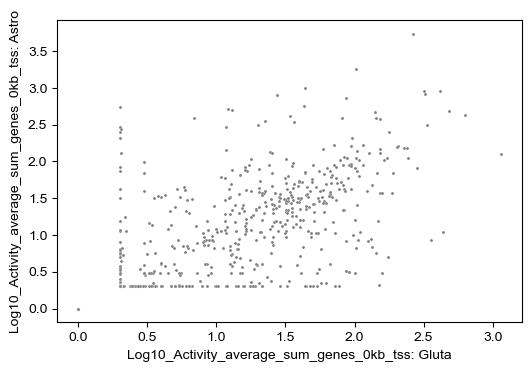

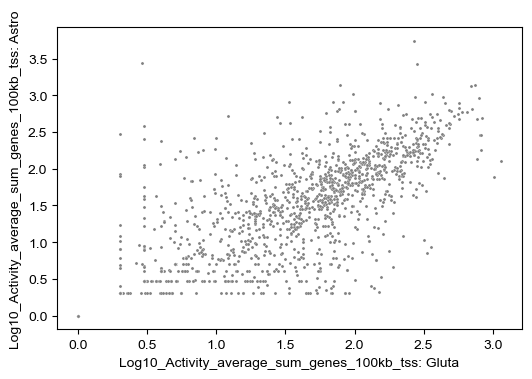

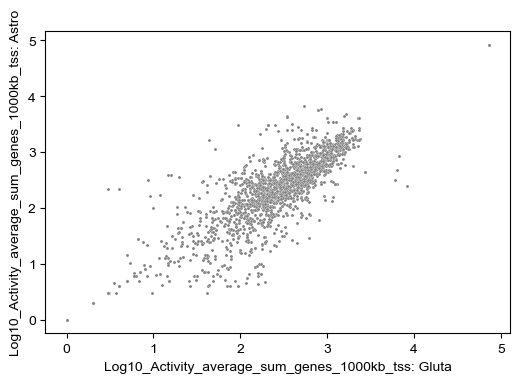

In [27]:
%matplotlib inline
cellgroups = marker_genes_df_log['Compared_groups'][0].split('; ')

for _dist in [0,100,1000]:


    fig, ax = plt.subplots(1, 1,dpi=100)

    x_col = f'Log10_Activity_average_sum_genes_{_dist}kb_tss: {cellgroups[0]}'
    y_col = f'Log10_Activity_average_sum_genes_{_dist}kb_tss: {cellgroups[1]}'
    ax = sns.scatterplot(data=marker_genes_df_log, 
                x=x_col,
                y=y_col, s=5,color='gray')


## 6.2 Inspect the pts_mean

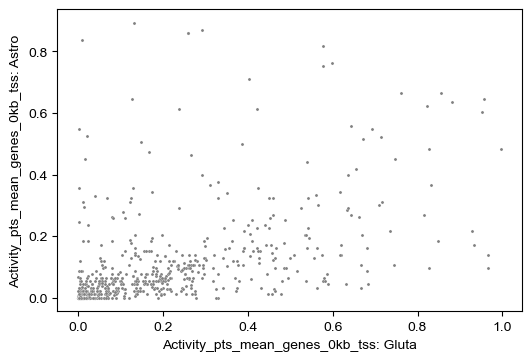

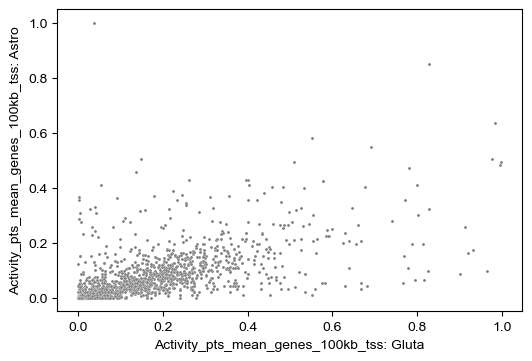

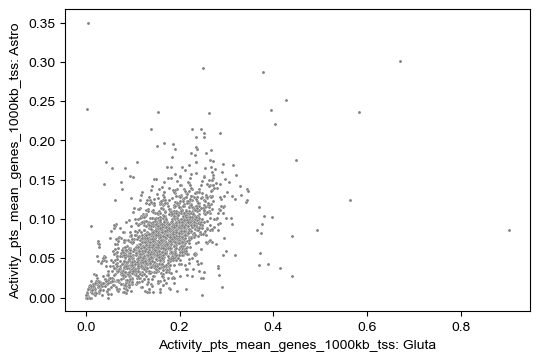

In [28]:
%matplotlib inline
cellgroups = marker_genes_df_log['Compared_groups'][0].split('; ')

for _dist in [0,100,1000]:


    fig, ax = plt.subplots(1, 1,dpi=100)

    x_col = f'Activity_pts_mean_genes_{_dist}kb_tss: {cellgroups[0]}'
    y_col = f'Activity_pts_mean_genes_{_dist}kb_tss: {cellgroups[1]}'
    ax = sns.scatterplot(data=marker_genes_df_log, 
                x=x_col,
                y=y_col, s=5,color='gray')